In [1]:
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
import mplstylize as scimpl

# # Use retina 
%config InlineBackend.figure_format = 'retina'

In [2]:
def q_SL(omega, params1, params2):
    d1, v1, rho1 = params1
    d2, v2, rho2 = params2
    t1, t2 = d1 / v1, d2 / v2
    eps = np.abs(rho1 * v1 - rho2 * v2) / np.sqrt(rho1 * v1 * rho2 * v2)
    arg = np.cos(omega * (t1 + t2)) - (0.5 * eps**2) * np.sin(omega * t1) * np.sin(
        omega * t2
    )
    arg[arg >= 1] = np.nan
    arg[arg <= -1] = np.nan
    return np.arccos(arg) / (d1 + d2)

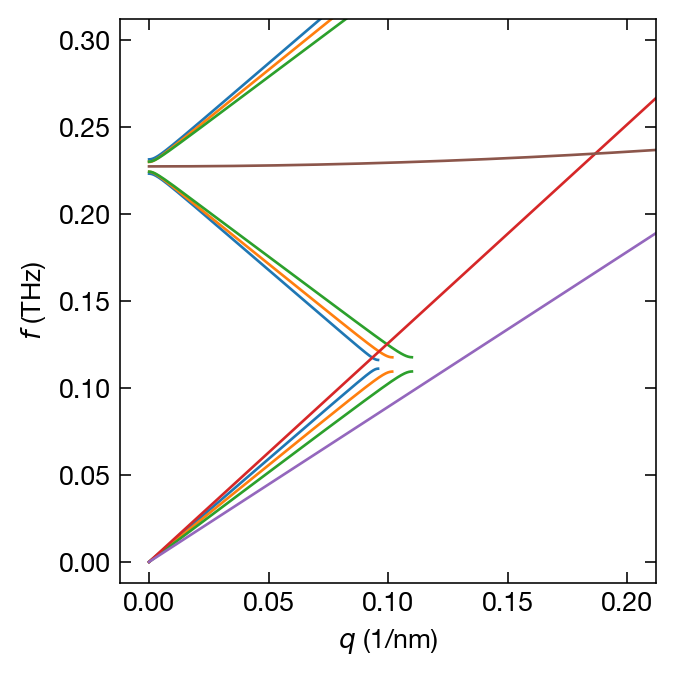

In [3]:
stiffness = 87 / 413.567  # THz nm^2
anis_gap = 0.22729  # THz

# SI units
v1, rho1, d1 = 7.9, 4.96, 0.3945 * 70  # [nm/ps], [g/cm^2], [nm], STO
v2, rho2, d2 = 5.6, 6.20, 0.3987 * 10  # [nm/ps], [g/cm^2], [nm], SRO

params1 = (d1, v1, rho1)  # STO
params2 = (d2, v2, rho2)  # SRO

w = 2 * np.pi * np.linspace(0, 1, 1000000)
q = np.pi * np.linspace(0, .2, 1000)  # 1/nm

fig, ax = plot.subplots(figsize=(3.4, 3.4))

sl_periods = [(71, 12), (54, 24), (34, 38)]

for n in sl_periods:
    params1 = (0.3945 * n[0], v1, rho1)  # STO
    params2 = (0.3987 * n[1], v2, rho2)  # SRO
    ax.plot(
        q_SL(w, params1, params2),
        w / (2 * np.pi),
        label="SL [{}, {}]".format(n[0], n[1]),
    )

ax.plot(q, v1 * q / (2 * np.pi), label="STO")
ax.plot(q, v2 * q / (2 * np.pi), label="SRO")
ax.plot(q, anis_gap + stiffness * q**2, label="FMR")
ax.set(xlabel=r"$q$ (1/nm)", ylabel=r"$f$ (THz)")

pad = .012 
ax.set(xlim=(0-pad, .2+pad), ylim=(0-pad, 0.3+pad))
# ax.legend(ncols=1, loc="lower right", frameon=False)
plot.show()